# Linear Regression Model

We decided to use linear regression to forecast our covid-19 data since it is easy to implement and interpret.

In [ ]:
! pip install statsmodels

     |████████████████████████████████| 9.8 MB 124 kB/s 
     |████████████████████████████████| 233 kB 48.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# import all the packages at the top of the notebook
import sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels
from statsmodels.api import OLS
from sklearn.model_selection import cross_val_score

# Fit Linear Regression on Complete Data
We are starting by going through the imputed full dataframe to include all of our features to see how well our model performs.

In [ ]:
pd.read_csv('imputed_clean_good_full_df_all_features.csv').sort_values('time_value')

,Unnamed: 0,geo_value,time_value,covid_cases,confirmed_covid_visit,doctor_visits,hospital_admissions,google_anosmia_volume,google_ageusia_volume,covid_deaths,...,time_value_t_minus_1,covid_cases_t_minus_1,confirmed_covid_vist_t_minus_1,doctor_visits_t_minus_1,hospital_admissions_t_minus_1,google_anosmia_volume_t_minus_1,google_ageusia_volume_t_minus_1,covid_deaths_t_minus,home_time_t_minus_1,covid_cases_t_plus_one
0,0,5,2020-02-21,0.0,0.011169,0.000000,0.113524,0.06,0.06,0.0,...,2020-02-20,0.0,0.012182,0.000000,0.110992,0.06,0.06,0.0,609.137236,0.0
2273,2346,12,2020-02-21,0.0,0.011176,0.012824,0.090121,0.06,0.04,0.0,...,2020-02-20,0.0,0.012328,0.000000,0.090382,0.06,0.04,0.0,618.223197,0.0
1427,1490,14,2020-02-21,0.0,0.002221,0.102249,0.104829,0.07,0.03,0.0,...,2020-02-20,0.0,0.002446,0.102826,0.111187,0.06,0.03,0.0,600.708711,0.0
3947,4041,1,2020-02-21,0.0,0.017125,0.000000,0.149643,0.10,0.10,0.0,...,2020-02-20,0.0,0.020132,0.000000,0.151167,0.07,0.10,0.0,524.377586,0.0
1850,1918,10,2020-02-21,0.0,0.003301,0.098592,0.093063,0.07,0.05,0.0,...,2020-02-20,0.0,0.003528,0.098592,0.091819,0.09,0.08,0.0,651.814286,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1912,14,2021-04-18,1105979.0,0.396314,4.824419,1.098291,0.11,0.07,23635.0,...,2021-04-17,1105681.0,0.447822,5.019166,1.077912,0.13,0.09,23610.0,721.432060,1106233.0
3105,3188,8,2021-04-18,98487.0,0.390862,3.305628,0.852671,0.11,0.15,1579.0,...,2021-04-17,98388.0,0.393359,3.464602,0.635434,0.13,0.14,1579.0,681.184413,98598.0
2272,2340,10,2021-04-18,235590.0,0.434494,3.969369,1.179754,0.11,0.06,4896.0,...,2021-04-17,235527.0,0.400532,3.960434,1.082365,0.12,0.06,4891.0,756.964855,235659.0
1426,1487,6,2021-04-18,89810.0,0.580476,2.517366,1.873157,0.28,0.16,1307.0,...,2021-04-17,89781.0,0.394292,2.644986,2.568942,0.28,0.10,1307.0,633.126667,89828.0


In [ ]:
# initialize a scaler
scaler1 = StandardScaler()

# read in the data
full_imputed_unsorted = pd.read_csv('imputed_clean_good_full_df_all_features.csv')
full_imputed_unsorted['geo_value'] = full_imputed_unsorted['geo_value'].astype('float')
fiu_cols = full_imputed_unsorted.columns
#use_this['geo_value_t_minus_1'] = use_this['geo_value_t_minus_1'].astype('float')
full_imputed = pd.DataFrame(np.array(full_imputed_unsorted.sort_values('time_value')))
full_imputed.columns = fiu_cols
full_imputed = full_imputed.drop(columns = ['Unnamed: 0','time_value','time_value_t_minus_1'])
keep_cols_full_imputed = full_imputed.columns

# fit the cleanedish data to the 
scaled1 = scaler1.fit(full_imputed)
full_df_scaled = scaled1.transform(full_imputed)
full_df_scaled

array([[-0.70903045, -0.48801062, -0.88565298, ..., -0.43267497,
        -1.90514839, -0.48933603],
       [ 1.02945004, -0.48801062, -0.88564388, ..., -0.43267497,
        -1.82029542, -0.48933603],
       [ 1.52615875, -0.48801062, -0.89728451, ..., -0.43267497,
        -1.98386164, -0.48933603],
       ...,
       [ 0.53274133,  0.96461909, -0.33537149, ...,  1.2042224 ,
        -0.52459946,  0.95803009],
       [-0.46067609,  0.06575089, -0.14560886, ...,  0.00474577,
        -1.68111324,  0.06236794],
       [-0.9573848 , -0.02420992, -0.63096087, ..., -0.0949875 ,
        -1.49473244, -0.02722838]])

For splitting the training and testing data, we decided to do a 90% : 10% split. For splitting on time, we will be taking the first 90% to be the training and the last 10% as the testing. Since 4789 is 90% of the entire dataset, we can manually split the data using slicers. 

Below, to visualize the Backward subset selection, we will store the mses we recieve from cross validation in a list called ```models_mse```

In [ ]:
models_mse = []

In [ ]:
# First model : Includes all features we want to look at

train1 = pd.DataFrame(full_df_scaled[:4789,:])
train1.columns = keep_cols_full_imputed
test1 = pd.DataFrame(full_df_scaled[4789:,:])
test1.columns = keep_cols_full_imputed
xtrain1 = train1.iloc[:,:18]
ytrain1 = train1.iloc[:,18]
xtest1 = test1.iloc[:,:18]
ytest1 = test1.iloc[:,18]

In [ ]:
# utilize TimeSeriesSplit and cross_val_score to obtain the MSE
tscv = TimeSeriesSplit(n_splits=5)
lr1 = LinearRegression()
print(np.mean(cross_val_score(lr1, xtrain1 , ytrain1, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))
models_mse.append(np.mean(cross_val_score(lr1, xtrain1 , ytrain1, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.00010399269854383399


Below, we will look at the OLS summary and see which coefficients are the most important to the model and perform some feature selection.

In [ ]:
OLS(train1.iloc[:,18], train1.iloc[:,:18]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     covid_cases_t_plus_one   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          7.346e+06
Date:                    Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                            19:35:06   Log-Likelihood:                          18328.
No. Observations:                    4789   AIC:                                 -3.662e+04
Df Residuals:                        4772   BIC:                                 -3.651e+04
Df Model:                              17                                                  
Covariance Type:                nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
geo_value                           0.0003   4.52e-05      7.005      0.000       0.000       0.000
covid_cases                         1.6082      0.012    137.031      0.000       1.585       1.631
confirmed_covid_visit            2.665e-05      0.001      0.041      0.967      -0.001       0.001
doctor_visits                       0.0030      0.001      5.221      0.000       0.002       0.004
hospital_admissions                 0.0024      0.001      2.649      0.008       0.001       0.004
google_anosmia_volume              -0.0002      0.000     -0.877      0.381      -0.001       0.000
google_ageusia_volume               0.0002      0.000      0.826      0.409      -0.000       0.001
covid_deaths                        0.0401      0.012      3.233      0.001       0.016       0.064
home_time                          -0.0002      0.000     -1.256      0.209      -0.000       0.000
geo_value_t_minus_1                 0.0003   4.52e-05      7.005      0.000       0.000       0.000
covid_cases_t_minus_1              -0.6068      0.012    -51.507      0.000      -0.630      -0.584
confirmed_covid_vist_t_minus_1     -0.0008      0.001     -1.259      0.208      -0.002       0.000
doctor_visits_t_minus_1            -0.0019      0.001     -3.229      0.001      -0.003      -0.001
hospital_admissions_t_minus_1      -0.0024      0.001     -2.681      0.007      -0.004      -0.001
google_anosmia_volume_t_minus_1 -3.077e-05      0.000     -0.170      0.865      -0.000       0.000
google_ageusia_volume_t_minus_1     0.0010      0.000      3.318      0.001       0.000       0.002
covid_deaths_t_minus               -0.0417      0.012     -3.390      0.001      -0.066      -0.018
home_time_t_minus_1                 0.0004      0.000      2.824      0.005       0.000       0.001
==============================================================================
Omnibus:                     4737.573   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17100648.792
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                     295.663   Cond. No.                     6.08e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on the summary from above, we will get rid of the ```google_anosmia_volume_t_minus_1``` attribute since it has the highest p-value.

#### Getting rid of 'google_anosmia_volume_t_minus_1'

In [ ]:
# fit the cleanedish data to the 
scaler2 = StandardScaler()

use_df_1 = full_imputed.drop(columns = ['google_anosmia_volume_t_minus_1'])
scaled_df1 = scaler2.fit(use_df_1)
full_df_scaled_1 = scaled_df1.transform(use_df_1)
train2 = pd.DataFrame(full_df_scaled_1[:4789,:])
train2.columns = use_df_1.columns
test2 = pd.DataFrame(full_df_scaled_1[4789:,:])
test2.columns = use_df_1.columns
xtrain2 = train2.iloc[:,:17]
ytrain2 = train2.iloc[:,17]
xtest2 = test2.iloc[:,:17]
ytest2 = test2.iloc[:,17]

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
lr2 = LinearRegression()
print(np.mean(cross_val_score(lr2, xtrain2 , ytrain2, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))
models_mse.append(np.mean(cross_val_score(lr2, xtrain2 , ytrain2, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.00010400535422689448


In [ ]:
OLS(train2.iloc[:,17], train2.iloc[:,:17]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     covid_cases_t_plus_one   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          7.807e+06
Date:                    Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                            19:35:17   Log-Likelihood:                          18328.
No. Observations:                    4789   AIC:                                 -3.662e+04
Df Residuals:                        4773   BIC:                                 -3.652e+04
Df Model:                              16                                                  
Covariance Type:                nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
geo_value                           0.0003   4.52e-05      7.009      0.000       0.000       0.000
covid_cases                         1.6082      0.012    137.084      0.000       1.585       1.631
confirmed_covid_visit            3.068e-05      0.001      0.047      0.962      -0.001       0.001
doctor_visits                       0.0030      0.001      5.228      0.000       0.002       0.004
hospital_admissions                 0.0024      0.001      2.646      0.008       0.001       0.004
google_anosmia_volume              -0.0002      0.000     -1.153      0.249      -0.000       0.000
google_ageusia_volume               0.0002      0.000      0.869      0.385      -0.000       0.001
covid_deaths                        0.0401      0.012      3.232      0.001       0.016       0.064
home_time                          -0.0002      0.000     -1.264      0.206      -0.000       0.000
geo_value_t_minus_1                 0.0003   4.52e-05      7.009      0.000       0.000       0.000
covid_cases_t_minus_1              -0.6068      0.012    -51.531      0.000      -0.630      -0.584
confirmed_covid_vist_t_minus_1     -0.0008      0.001     -1.262      0.207      -0.002       0.000
doctor_visits_t_minus_1            -0.0019      0.001     -3.234      0.001      -0.003      -0.001
hospital_admissions_t_minus_1      -0.0024      0.001     -2.677      0.007      -0.004      -0.001
google_ageusia_volume_t_minus_1     0.0009      0.000      3.690      0.000       0.000       0.001
covid_deaths_t_minus               -0.0417      0.012     -3.388      0.001      -0.066      -0.018
home_time_t_minus_1                 0.0004      0.000      2.819      0.005       0.000       0.001
==============================================================================
Omnibus:                     4737.798   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17099062.874
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                     295.649   Cond. No.                     5.85e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Getting rid of the 'confirmed covid_vist' column

In [ ]:
scaler3 = StandardScaler()

use_df_2 = use_df_1.drop(columns = ['confirmed_covid_visit'])
scaled_df2 = scaler3.fit(use_df_2)
full_df_scaled_2 = scaled_df2.transform(use_df_2)
train3 = pd.DataFrame(full_df_scaled_2[:4789,:])
train3.columns = use_df_2.columns
test3 = pd.DataFrame(full_df_scaled_2[4789:,:])
test3.columns = use_df_2.columns
xtrain3 = train3.iloc[:,:16]
ytrain3 = train3.iloc[:,16]
xtest3 = test3.iloc[:,:16]
ytest3 = test3.iloc[:,16]

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
lr3 = LinearRegression()
print(np.mean(cross_val_score(lr3, xtrain3 , ytrain3, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))
models_mse.append(np.mean(cross_val_score(lr3, xtrain3 , ytrain3, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.00010378636366765595


In [ ]:
OLS(train3.iloc[:,16], train3.iloc[:,:16]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     covid_cases_t_plus_one   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          8.329e+06
Date:                    Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                            19:35:28   Log-Likelihood:                          18328.
No. Observations:                    4789   AIC:                                 -3.663e+04
Df Residuals:                        4774   BIC:                                 -3.653e+04
Df Model:                              15                                                  
Covariance Type:                nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
geo_value                           0.0003   4.52e-05      7.012      0.000       0.000       0.000
covid_cases                         1.6082      0.012    137.099      0.000       1.585       1.631
doctor_visits                       0.0030      0.001      5.334      0.000       0.002       0.004
hospital_admissions                 0.0024      0.001      2.646      0.008       0.001       0.004
google_anosmia_volume              -0.0002      0.000     -1.154      0.249      -0.000       0.000
google_ageusia_volume               0.0002      0.000      0.871      0.384      -0.000       0.001
covid_deaths                        0.0401      0.012      3.232      0.001       0.016       0.064
home_time                          -0.0002      0.000     -1.275      0.202      -0.000       0.000
geo_value_t_minus_1                 0.0003   4.52e-05      7.012      0.000       0.000       0.000
covid_cases_t_minus_1              -0.6068      0.012    -51.536      0.000      -0.630      -0.584
confirmed_covid_vist_t_minus_1     -0.0008      0.000     -4.572      0.000      -0.001      -0.000
doctor_visits_t_minus_1            -0.0019      0.001     -3.285      0.001      -0.003      -0.001
hospital_admissions_t_minus_1      -0.0024      0.001     -2.677      0.007      -0.004      -0.001
google_ageusia_volume_t_minus_1     0.0009      0.000      3.701      0.000       0.000       0.001
covid_deaths_t_minus               -0.0417      0.012     -3.388      0.001      -0.066      -0.018
home_time_t_minus_1                 0.0004      0.000      2.839      0.005       0.000       0.001
==============================================================================
Omnibus:                     4737.307   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17099518.408
Skew:                           3.463   Prob(JB):                         0.00
Kurtosis:                     295.653   Cond. No.                     5.49e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Get rid of 'google_ageusia_volume'

In [ ]:
scaler4 = StandardScaler()

use_df_3 = use_df_2.drop(columns = ['google_ageusia_volume'])
scaled_df3 = scaler4.fit(use_df_3)
full_df_scaled_3 = scaled_df3.transform(use_df_3)
train4 = pd.DataFrame(full_df_scaled_3[:4789,:])
train4.columns = use_df_3.columns
test4 = pd.DataFrame(full_df_scaled_3[4789:,:])
test4.columns = use_df_3.columns
xtrain4 = train4.iloc[:,:15]
ytrain4 = train4.iloc[:,15]
xtest4 = test4.iloc[:,:15]
ytest4 = test4.iloc[:,15]

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
lr4 = LinearRegression()
print(np.mean(cross_val_score(lr4, xtrain4 , ytrain4, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))
models_mse.append(np.mean(cross_val_score(lr4, xtrain4 , ytrain4, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.00010419954455082995


In [ ]:
OLS(train4.iloc[:,15], train4.iloc[:,:15]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     covid_cases_t_plus_one   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          8.924e+06
Date:                    Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                            19:35:36   Log-Likelihood:                          18327.
No. Observations:                    4789   AIC:                                 -3.663e+04
Df Residuals:                        4775   BIC:                                 -3.654e+04
Df Model:                              14                                                  
Covariance Type:                nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
geo_value                           0.0003   4.51e-05      7.050      0.000       0.000       0.000
covid_cases                         1.6091      0.012    137.734      0.000       1.586       1.632
doctor_visits                       0.0030      0.001      5.440      0.000       0.002       0.004
hospital_admissions                 0.0024      0.001      2.702      0.007       0.001       0.004
google_anosmia_volume              -0.0001      0.000     -0.843      0.399      -0.000       0.000
covid_deaths                        0.0398      0.012      3.208      0.001       0.015       0.064
home_time                          -0.0002      0.000     -1.227      0.220      -0.000       0.000
geo_value_t_minus_1                 0.0003   4.51e-05      7.050      0.000       0.000       0.000
covid_cases_t_minus_1              -0.6077      0.012    -51.833      0.000      -0.631      -0.585
confirmed_covid_vist_t_minus_1     -0.0008      0.000     -4.489      0.000      -0.001      -0.000
doctor_visits_t_minus_1            -0.0019      0.001     -3.365      0.001      -0.003      -0.001
hospital_admissions_t_minus_1      -0.0024      0.001     -2.725      0.006      -0.004      -0.001
google_ageusia_volume_t_minus_1     0.0011      0.000      5.915      0.000       0.001       0.001
covid_deaths_t_minus               -0.0413      0.012     -3.364      0.001      -0.065      -0.017
home_time_t_minus_1                 0.0004      0.000      2.739      0.006       0.000       0.001
==============================================================================
Omnibus:                     4743.484   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17128202.714
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                     295.898   Cond. No.                     5.17e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Get rid of 'google_anosmia_volume'

In [ ]:
scaler5 = StandardScaler()

use_df_4 = use_df_3.drop(columns = ['google_anosmia_volume'])
scaled_df4 = scaler5.fit(use_df_4)
full_df_scaled_4 = scaled_df4.transform(use_df_4)
train5 = pd.DataFrame(full_df_scaled_4[:4789,:])
train5.columns = use_df_4.columns
test5 = pd.DataFrame(full_df_scaled_4[4789:,:])
test5.columns = use_df_4.columns
xtrain5 = train5.iloc[:,:14]
ytrain5 = train5.iloc[:,14]
xtest5 = test5.iloc[:,:14]
ytest5 = test5.iloc[:,14]

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
lr5 = LinearRegression()
print(np.mean(cross_val_score(lr5, xtrain5 , ytrain5, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))
models_mse.append(np.mean(cross_val_score(lr5, xtrain5 , ytrain5, cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.00010412363689504959


In [ ]:
OLS(train5.iloc[:,14], train5.iloc[:,:14]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     covid_cases_t_plus_one   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          9.107e+06
Date:                    Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                            19:35:50   Log-Likelihood:                          18198.
No. Observations:                    4789   AIC:                                 -3.637e+04
Df Residuals:                        4776   BIC:                                 -3.629e+04
Df Model:                              13                                                  
Covariance Type:                nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
geo_value                       -4.027e+09    1.3e+10     -0.310      0.757   -2.95e+10    2.14e+10
covid_cases                         1.6091      0.012    134.068      0.000       1.586       1.633
doctor_visits                       0.0030      0.001      5.294      0.000       0.002       0.004
hospital_admissions                 0.0024      0.001      2.595      0.009       0.001       0.004
covid_deaths                        0.0396      0.013      3.110      0.002       0.015       0.065
home_time                          -0.0002      0.000     -1.345      0.179      -0.001    9.37e-05
geo_value_t_minus_1              4.027e+09    1.3e+10      0.310      0.757   -2.14e+10    2.95e+10
covid_cases_t_minus_1              -0.6077      0.012    -50.452      0.000      -0.631      -0.584
confirmed_covid_vist_t_minus_1     -0.0008      0.000     -4.332      0.000      -0.001      -0.000
doctor_visits_t_minus_1            -0.0019      0.001     -3.270      0.001      -0.003      -0.001
hospital_admissions_t_minus_1      -0.0024      0.001     -2.612      0.009      -0.004      -0.001
google_ageusia_volume_t_minus_1     0.0010      0.000      6.925      0.000       0.001       0.001
covid_deaths_t_minus               -0.0412      0.013     -3.260      0.001      -0.066      -0.016
home_time_t_minus_1                 0.0004      0.000      2.731      0.006       0.000       0.001
==============================================================================
Omnibus:                     3948.920   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13360194.281
Skew:                           2.393   Prob(JB):                         0.00
Kurtosis:                     261.711   Cond. No.                     5.57e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.71e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After doing the Backward subset selection 5 times, we noticed a minimum occurring, so decided to plot out the MSES to see where it is.

[-0.00010399269854383399, -0.00010400535422689448, -0.00010378636366765595, -0.00010419954455082995, -0.00010412363689504959]


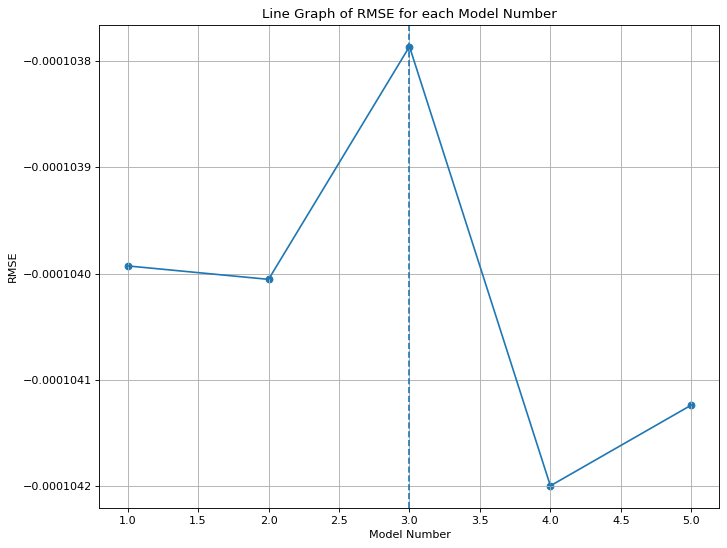

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(range(1,6),models_mse)
plt.plot(range(1,6),models_mse)
plt.axvline(x=3,linestyle = '--')
plt.ylabel('RMSE')
plt.xlabel('Model Number')
plt.title('Line Graph of RMSE for each Model Number')
plt.grid()
print(models_mse)

Based on the manual backwards subset selection, we found that the lowest magnitude for rmse was the 3rd model we trained. 

# Fit on Optimized Linear Regression Model
Now we will go about training and testing our best model

In [ ]:
full_df_scaled_2.shape

(5321, 17)

In [ ]:
# fit and predict to get RMSE for train and test
lr3.fit(xtrain3, ytrain3)
train_predictions = lr3.predict(xtrain3)
test_predictions = lr3.predict(xtest3)

# must inverse transform to get the true values again
full_scaled_df_forecast_train = np.append(xtrain3, train_predictions.reshape(len(train_predictions),1), axis = 1)
full_scaled_df_forecast_test = np.append(xtest3, test_predictions.reshape(len(test_predictions),1), axis = 1)
full_df_forecast_train = scaler3.inverse_transform(full_scaled_df_forecast_train)
full_df_forecast_test = scaler3.inverse_transform(full_scaled_df_forecast_test)
test_df_transformed = scaler3.inverse_transform(full_df_scaled_2[len(full_df_scaled_2) - len(test_predictions):,:])
train_df_transformed = scaler3.inverse_transform(full_df_scaled_2[:len(full_df_scaled_2) - len(test_predictions),:])

# print out the training and testing rmse
print('Train RMSE: ',np.sqrt(mean_squared_error(train_df_transformed[:,16], full_df_forecast_train[:,16])))
print('Test RMSE: ',np.sqrt(mean_squared_error(test_df_transformed[:,16], full_df_forecast_test[:,16])))


print('Train $R^{2}$:',lr3.score(xtrain3,ytrain3))
print('Test $R^{2}$:',lr3.score(xtest3,ytest3))

Train RMSE:  857.6800823455156
Test RMSE:  356.292264790975
Train $R^{2}$: 0.9999613577220372
Test $R^{2}$: 0.9999982766904577


# Plotting for a random county
Based on the data, we will randomly choose a county by looking at the geocodes and plotting with respect to that county.

In [ ]:
(unique, counts) = np.unique(full_imputed.geo_value, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[1.0 372]
 [2.0 283]
 [3.0 385]
 [4.0 299]
 [5.0 415]
 [6.0 308]
 [7.0 319]
 [8.0 416]
 [9.0 420]
 [10.0 423]
 [11.0 423]
 [12.0 417]
 [13.0 418]
 [14.0 423]]


In order to get the correct indices that correspond to the geo_value 10, we went through the indices that held the records for geo_value 10 and stored those in lists. Since we know the training data occurs within the first 4789 rows, we check if the index referring to an observation for geo_value 10 is less than or greater than that value. The condition determines whether or not it is a training or testing subset. Then for the predicted values, we have to make sure they are the same relative to their training/testing counterpart. So for the testing predictions, we have to subtract whatever the testing index is by 4789 since the predictions list is already the length of the testing dataset.

In [ ]:
new_use_full_imputed = full_imputed.drop(columns = ['google_anosmia_volume_t_minus_1','confirmed_covid_visit'])

geo_10 = full_imputed[full_imputed['geo_value'] == 10]
geo_10_inds = geo_10.index.values

# iterate through the geo_10_inds to find the ones that are within the training and testing data
geo_10_train_inds = []
geo_10_test_inds = []
geo_10_test_inds_ypred = []

for i in geo_10_inds:
    if i < 4789:
        geo_10_train_inds.append(i)
    else:
        geo_10_test_inds.append(i)
        geo_10_test_inds_ypred.append(i-4789)

In [ ]:
geo_10.covid_cases.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 4            0.0
9            0.0
17           0.0
29           0.0
36           0.0
          ...   
5255    235230.0
5269    235326.0
5286    235432.0
5304    235527.0
5318    235590.0
Name: covid_cases, Length: 423, dtype: object>

We use the county associated with the geo_value 10 since it has the highest number of observations. Looking at the max number of cases for geo_value 10, we are able to see that it is associated with the FIPS 06059 which refers to Orange County.

In [ ]:
geo_10_train = use_df_2.iloc[geo_10_train_inds,16]
geo_10_test = use_df_2.iloc[geo_10_test_inds,16]
geo_10_preds = test_predictions[geo_10_test_inds_ypred]
print(len(geo_10_train))
print(len(geo_10_test))
print(len(geo_10_preds))

381
42
42


Now that we have our geo_10 train/test and test predictions data, we can plot it out.

First we will plot the training data against the training predictions

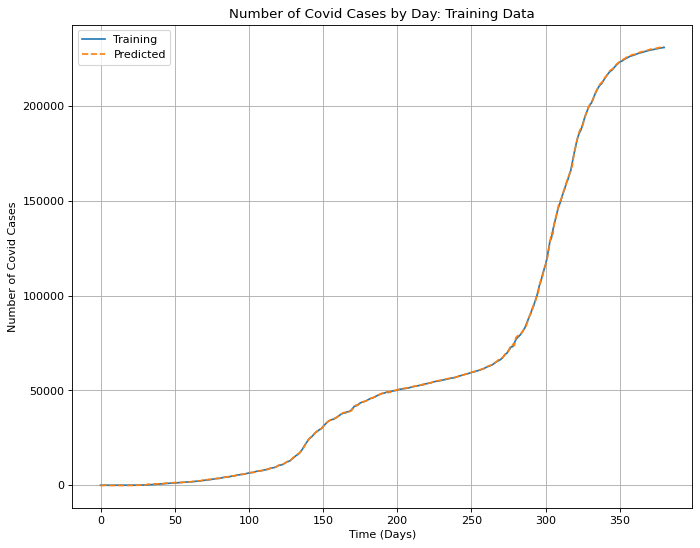

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.plot(range(len(geo_10_train)),train_df_transformed[geo_10_train_inds,16], label = 'Training')
plt.plot(range(len(geo_10_train)),full_df_forecast_train[geo_10_train_inds,16], label = 'Predicted', linestyle = '--')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Covid Cases')
plt.title('Number of Covid Cases by Day: Training Data')
plt.grid()
plt.legend()

Since there are very little differences we can see in the plot, we will plot the residuals to supplement this plot.

-77.04261312761494


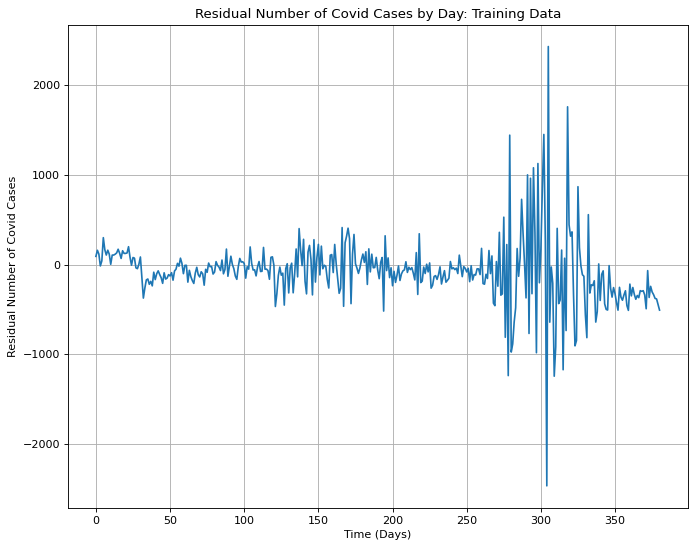

In [ ]:
figure(figsize=(10, 8), dpi=80)
train_resids = np.array(train_df_transformed[geo_10_train_inds,16]) - np.array(full_df_forecast_train[geo_10_train_inds,16])
plt.plot(range(len(train_resids)),train_resids)
plt.xlabel('Time (Days)')
plt.ylabel('Residual Number of Covid Cases')
plt.title('Residual Number of Covid Cases by Day: Training Data')
plt.grid()
print(np.mean(train_resids))

In addition to the residual plot, we printed out the mean residual of the training/training predictions which ended up being approximately -77.

Now we will do the same thing but with the Testing and Testing Predictions

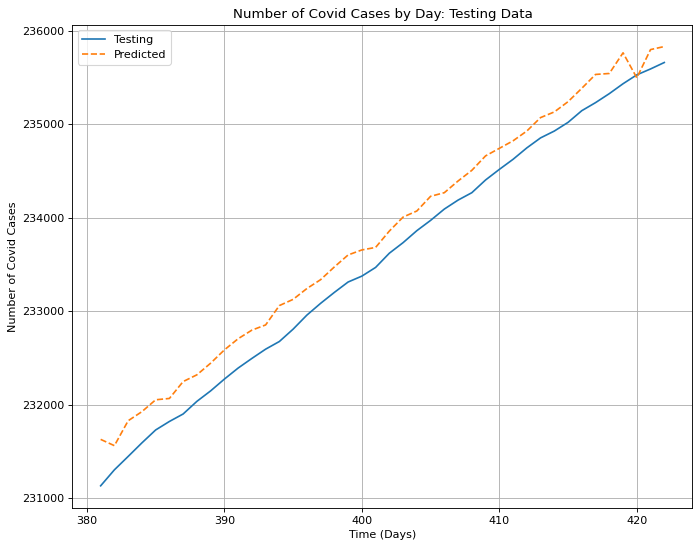

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),test_df_transformed[geo_10_test_inds_ypred,16], label = 'Testing')
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),full_df_forecast_test[geo_10_test_inds_ypred,16], label = 'Predicted', linestyle = '--')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Covid Cases')
plt.title('Number of Covid Cases by Day: Testing Data')
plt.grid()
plt.legend()

Unlike with the training data, the testing data shows more difference in the predictions. It looks like the model underestimates the number of forecasted covid cases.

Now we will plot and print out the residuals and the mean of them.

-261.42364056057636


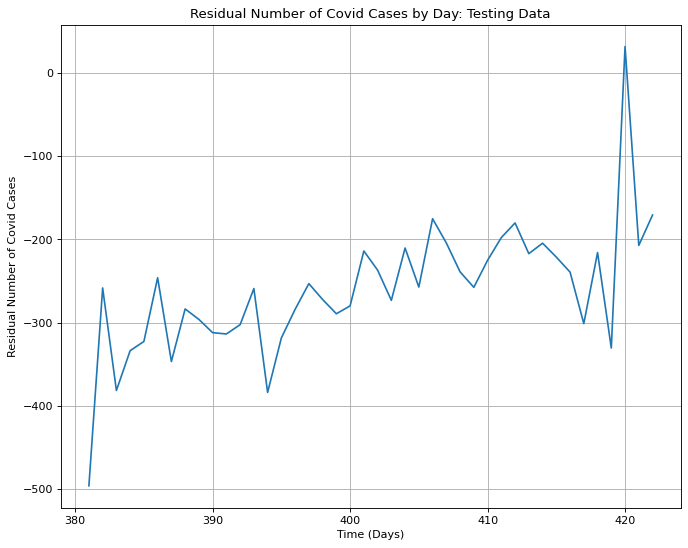

In [ ]:
figure(figsize=(10, 8), dpi=80)
test_resids = np.array(test_df_transformed[geo_10_test_inds_ypred,16]) - np.array(full_df_forecast_test[geo_10_test_inds_ypred,16])
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),test_resids)
plt.xlabel('Time (Days)')
plt.ylabel('Residual Number of Covid Cases')
plt.title('Residual Number of Covid Cases by Day: Testing Data')
plt.grid()
print(np.mean(test_resids))

We see that the majority of the residuals lie below 0 since the model underestimates the number of forecasted covid cases. In addition, the mean residual is much higher for the testing data than it is for the training.

Now, we will plot the training/testing and their respective predictions on the same plot.

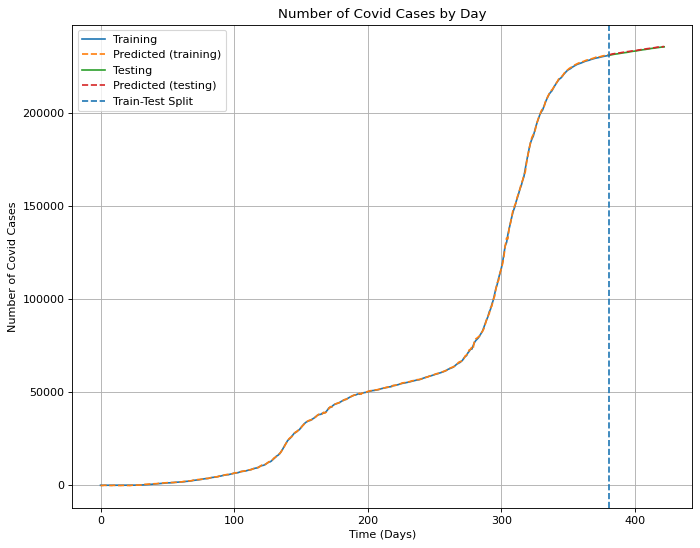

In [ ]:
figure(figsize=(10, 8), dpi=80)
plt.plot(range(len(geo_10_train)),train_df_transformed[geo_10_train_inds,16], label = 'Training')
plt.plot(range(len(geo_10_train)),full_df_forecast_train[geo_10_train_inds,16], label = 'Predicted (training)', linestyle = '--')
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),test_df_transformed[geo_10_test_inds_ypred,16], label = 'Testing')
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),full_df_forecast_test[geo_10_test_inds_ypred,16], label = 'Predicted (testing)', linestyle = '--')
plt.axvline(x=len(geo_10_train),linestyle = '--', label = 'Train-Test Split')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Covid Cases')
plt.title('Number of Covid Cases by Day')
plt.grid()
plt.legend()

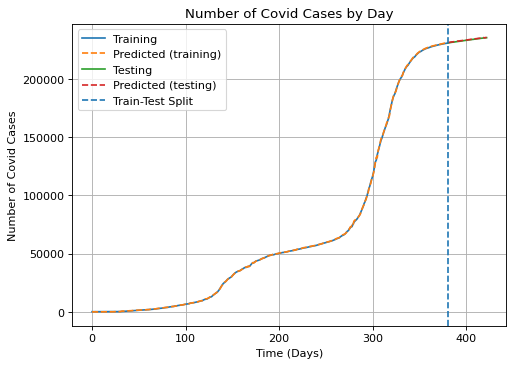

In [ ]:
figure(figsize=(7, 5), dpi=80)
plt.plot(range(len(geo_10_train)),train_df_transformed[geo_10_train_inds,16], label = 'Training')
plt.plot(range(len(geo_10_train)),full_df_forecast_train[geo_10_train_inds,16], label = 'Predicted (training)', linestyle = '--')
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),test_df_transformed[geo_10_test_inds_ypred,16], label = 'Testing')
plt.plot(range(len(geo_10_train),len(geo_10_train)+len(geo_10_test)),full_df_forecast_test[geo_10_test_inds_ypred,16], label = 'Predicted (testing)', linestyle = '--')
plt.axvline(x=len(geo_10_train),linestyle = '--', label = 'Train-Test Split')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Covid Cases')
plt.title('Number of Covid Cases by Day')
plt.grid()
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=23c8e36e-a74e-49fc-afb9-820cfed248b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>